In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

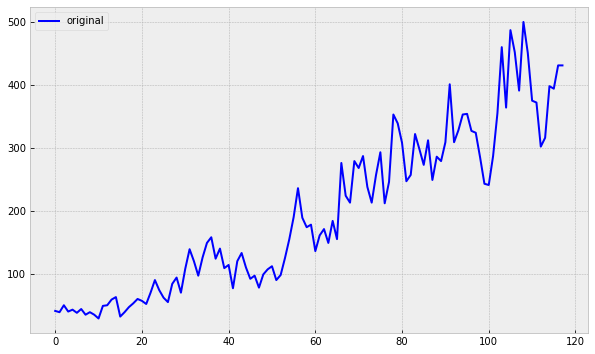

In [3]:
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']
series = series.fillna(method='ffill')

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 6))
    plt.plot(series, color='blue',label='original')
    plt.legend()

In [4]:
#преобразуем ряд в стационарный
series_1 = boxcox(series, 0)
stat_series = series_1[1:] - series_1[:-1]

In [89]:
#для стационраного ряда используем простое экспоненциальное сглаживание

In [55]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [92]:
ema_stat = exponential_moving_average(stat_series, 0.75)

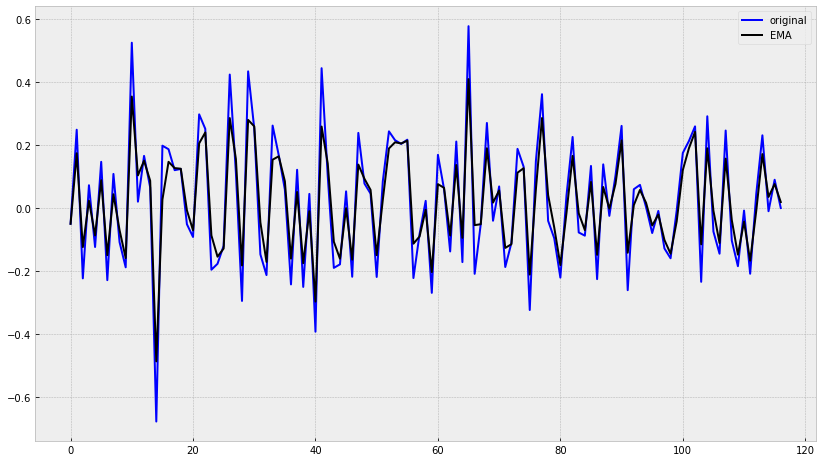

In [93]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(stat_series, color='blue',label='original')
    plt.plot(ema_stat, color='black',label='EMA')
    plt.legend()

In [ ]:
#так как в исходном ряде есть тренд, то для его описания будем использовать двойное экспоненциальное сглаживание

In [78]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha * value + (1-alpha) * (level + trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [98]:
def plot_dema(alpha, beta):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', label='DEMA')
        plt.legend()

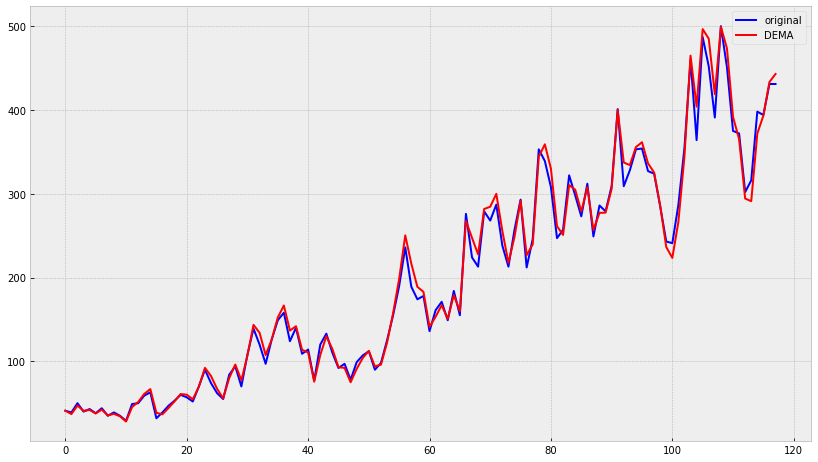

In [99]:
plot_dema(0.75, 0.25)